<a href="https://colab.research.google.com/github/kchamarty/pythonproject/blob/master/loan_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import pandas_profiling

#%matplotlib notebook

data_loan_debt = pd.read_csv('https://raw.githubusercontent.com/kchamarty/pythonproject/master/data/homeloans.csv')
print("column names are :",[x for x in data_loan_debt.columns])
print("number of columns : %d" % len(data_loan_debt.columns))


column names are : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'ApplicantDebt', 'CoApplicantDebt', 'Loan_Status']
number of columns : 15


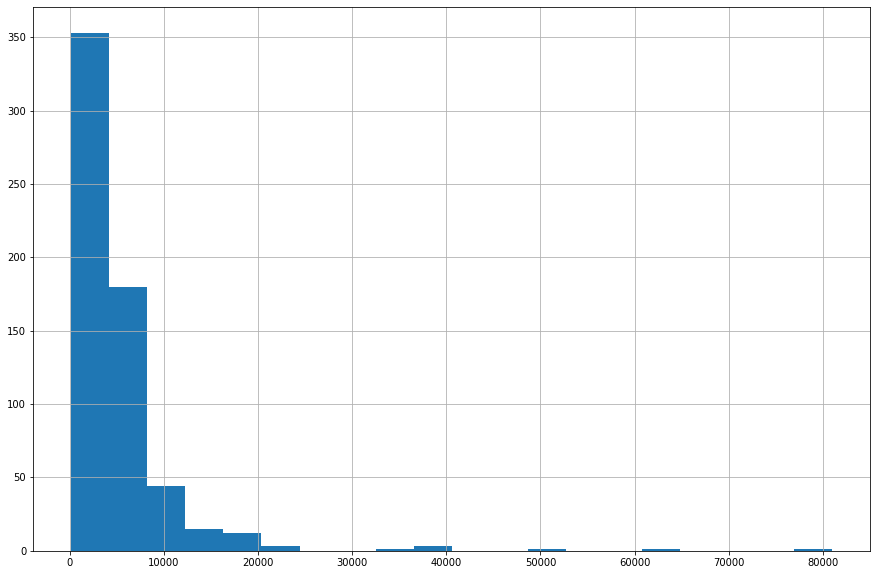

In [12]:
# Displaying the income distribuion of the Applicants using histogram
import matplotlib as plot
%matplotlib inline
data_loan_debt.ApplicantIncome.hist(bins=20,figsize=(15,10))

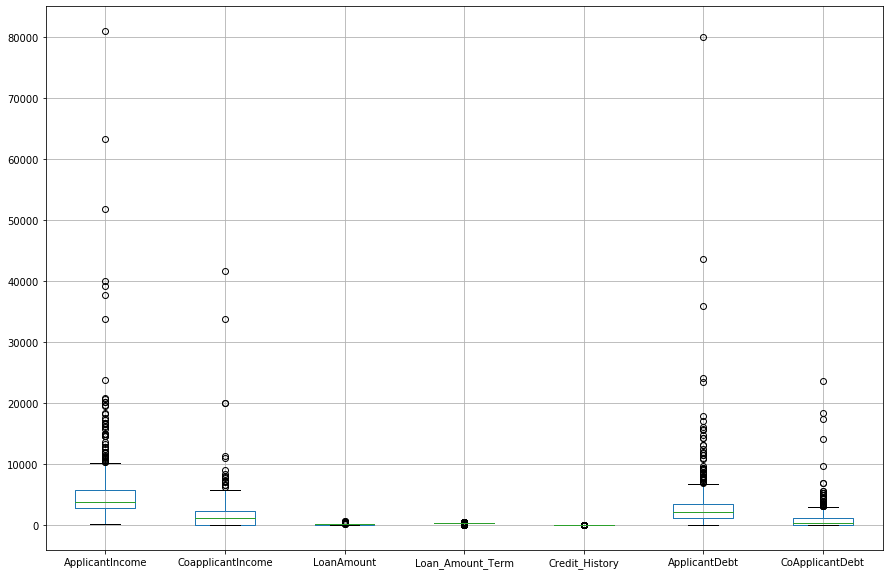

In [13]:
data_loan_debt.boxplot(figsize=(15,10))

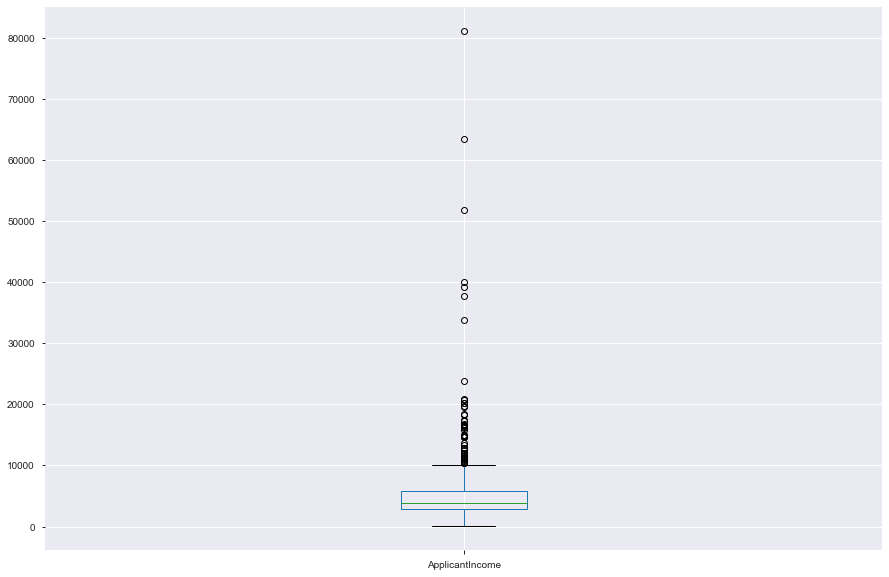

In [0]:
#Box Plot of Application Income
data_loan_debt.boxplot(column='ApplicantIncome', figsize=(15,10))

Graduate             AxesSubplot(0.1,0.15;0.363636x0.75)
Not Graduate    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

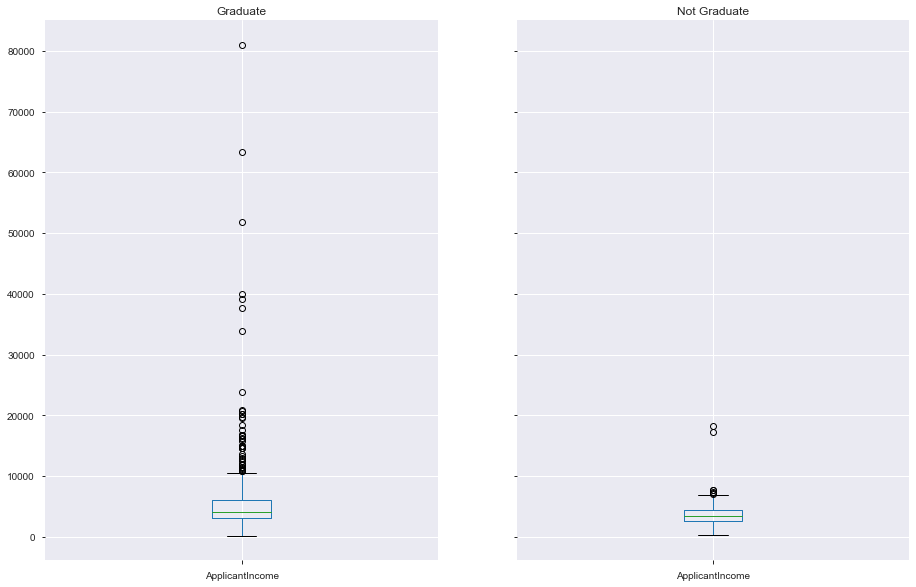

In [0]:
#Box Plot of Application Income group by  Education
data_loan_debt.groupby(by='Education').boxplot(column='ApplicantIncome', figsize=(15,10))

In [0]:
#Find Frequency by credit History

data_loan_debt.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
# Find Frequency by credit History and Loan status

loan_prob=data_loan_debt.groupby(by=['Credit_History','Loan_Status'])['Loan_ID'].count()
print(loan_prob)

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N               97
                Y              378
Name: Loan_ID, dtype: int64


Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


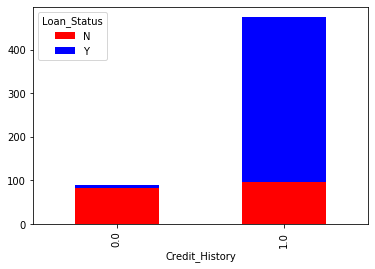

In [16]:
temp3=pd.crosstab(data_loan_debt['Credit_History'],data_loan_debt['Loan_Status'])
print(temp3)
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


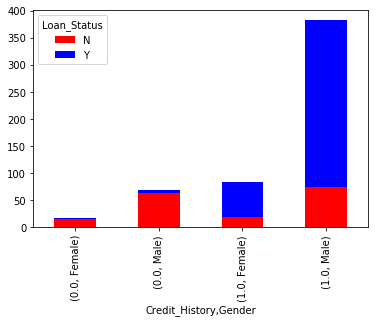

In [20]:
temp4=pd.crosstab([data_loan_debt['Credit_History'],data_loan_debt['Gender']],data_loan_debt['Loan_Status'])
print(temp4)

temp4.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [0]:
from matplotlib import pyplot as plt;
import numpy as np;
plt.style.use('seaborn');



In [0]:


fig,ax = plt.subplots();
x = 4
width = 0.35 
ax.bar(temp4)

<BarContainer object of 2 artists>

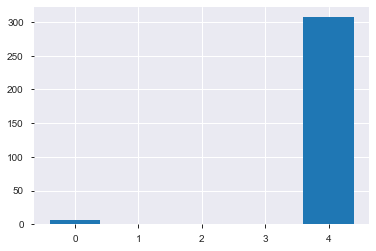

In [0]:
ypos=[0,4]
#ypos1=[1,5]
plot.pyplot.bar(ypos,temp4.Male.Y)

In [0]:
data_loan_debt.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
ApplicantDebt         0
CoApplicantDebt       0
Loan_Status           0
dtype: int64

In [0]:
data_loan_debt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
ApplicantDebt         0
CoApplicantDebt       0
Loan_Status           0
dtype: int64

In [0]:
table=data_loan_debt.pivot_table('LoanAmount','Self_Employed','Education',aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [0]:
#Data cleaning based on 

In [0]:
#Create new feature rate/sq feet based on propert categoty.
print(data_loan_debt.Property_Area.value_counts())

data_loan_debt['ratespersqfeet']=data_loan_debt.Property_Area.map({'Semiurban':7000,'Urban':10000,'Rural':4000})
print(data_loan_debt.ratespersqfeet.value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
7000     233
10000    202
4000     179
Name: ratespersqfeet, dtype: int64


In [22]:
#create another new feature Income Status by grouping 

def incomegrader(x):
    if x<=21000:
        return "low"
    elif x<=41000:
        return "mid"
    elif x<=61000:
        return "good"
    else:
        return "high"

data_loan_debt["Income_Status"]=  data_loan_debt.ApplicantIncome.apply(lambda x:incomegrader(x))
print(data_loan_debt.Income_Status.value_counts())

low     606
mid       5
high      2
good      1
Name: Income_Status, dtype: int64
